Projekt zaliczeniowy s24101 PAD
"Top Spotify songs from 2000-2019"

Content

artist: Name of the Artist.
song: Name of the Track.
duration_ms: Duration of the track in milliseconds.
explicit: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
year: Release Year of the track.
popularity: The higher the value the more popular the song is.
danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
genre: Genre of the track.

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot

Import danych

In [2]:
df = pd.read_csv("/Users/michalluniewski/Documents/PAD/Projekt_s24101/songs_normalize.csv")
df.head(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,pop
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.861,103.035,"pop, rock"
8,Destiny's Child,Say My Name,271333,False,1999,75,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,"pop, R&B"
9,Modjo,Lady - Hear Me Tonight,307153,False,2001,77,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,Dance/Electronic


Przygotowanie danych


In [3]:
df.isna().any().sum()

0

In [4]:
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

<AxesSubplot:>

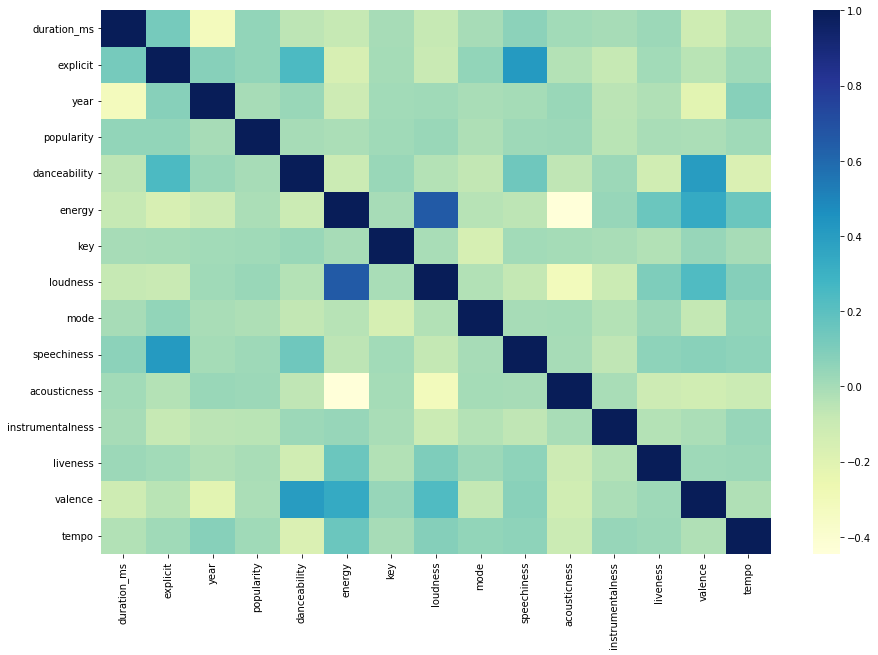

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), cmap="YlGnBu", ax=ax)

In [6]:
#usuwam "key" ze wzgledu na brak relacji
df.drop('key',axis=1, inplace=True)

In [7]:
df.year.unique()

array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017,
       2014])

In [8]:
#usuwam piosenki, które nie znajdują sie w przedziale 2000-2019
df_years_drop = df[(df['year'] <2000) | (df['year'] > 2019)].index
df = df.drop(df_years_drop)

Analiza z dashboardami


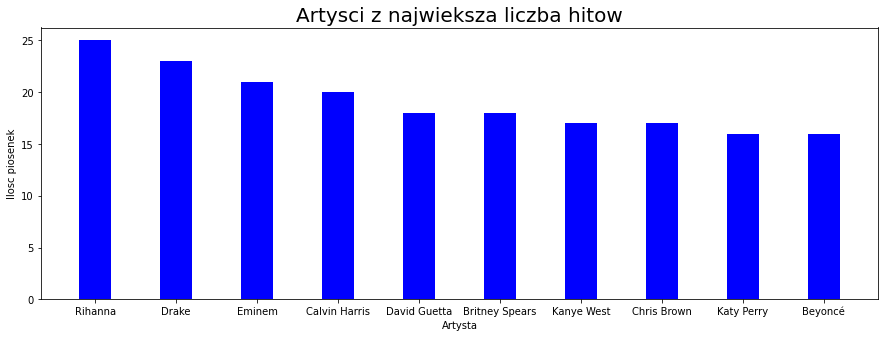

In [9]:
artist=df['artist'].value_counts()
artist
tp_artists_songs= artist[:10]
tp_artists_name =artist[:10].index
fig = plt.figure(figsize = (15, 5))
plt.bar(tp_artists_name,tp_artists_songs,width = 0.4,color="blue")
plt.xlabel("Artysta")
plt.ylabel("Ilosc piosenek")
plt.title('Artysci z najwieksza liczba hitow',color = 'black',fontsize = 20)
plt.show()

Text(0, 0.5, 'Ilosc piosenek')

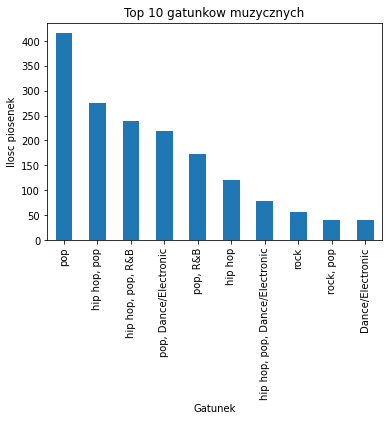

In [10]:
df['genre'].value_counts().head(10).plot(kind="bar", title="Top 10 gatunkow muzycznych")
plt.xlabel("Gatunek")
plt.ylabel("Ilosc piosenek")

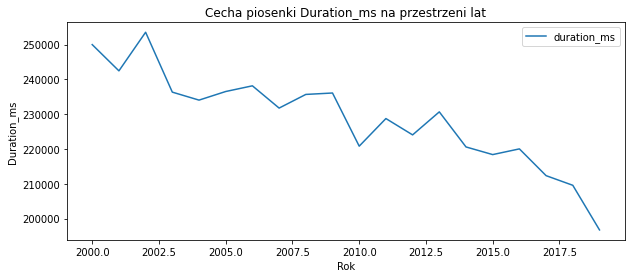

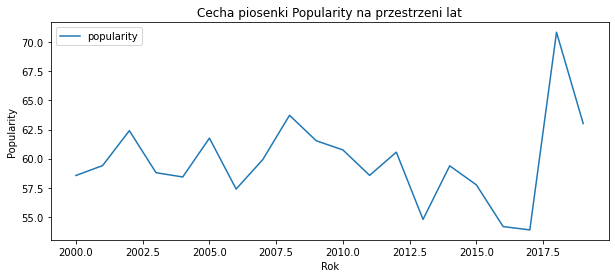

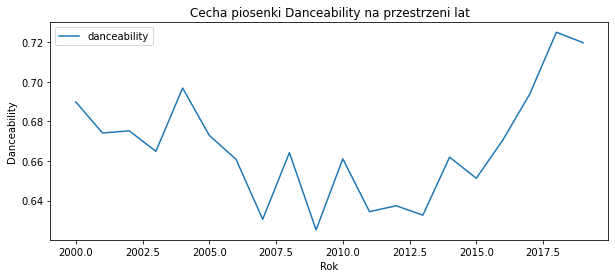

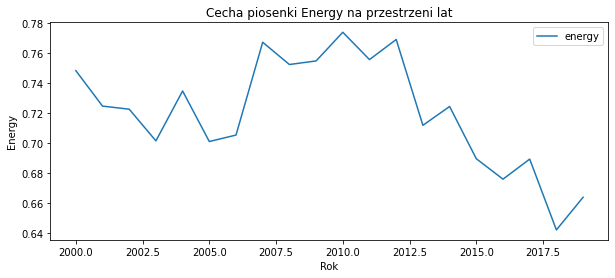

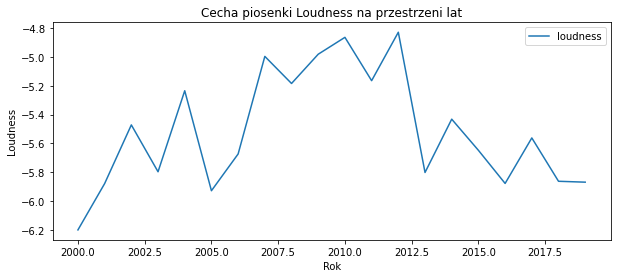

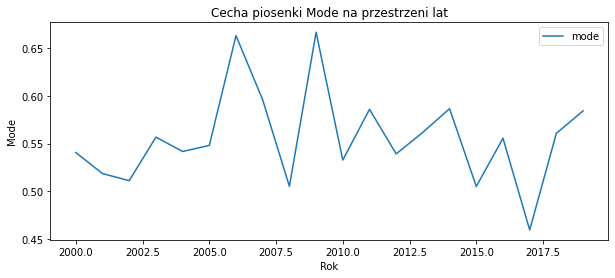

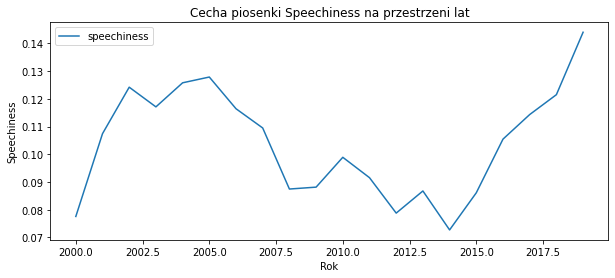

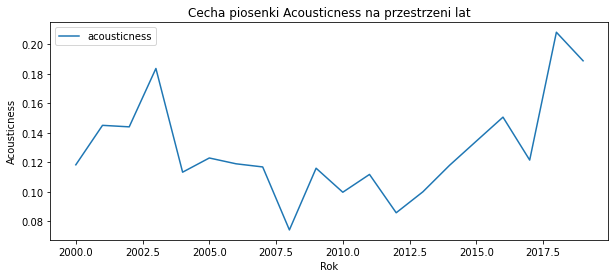

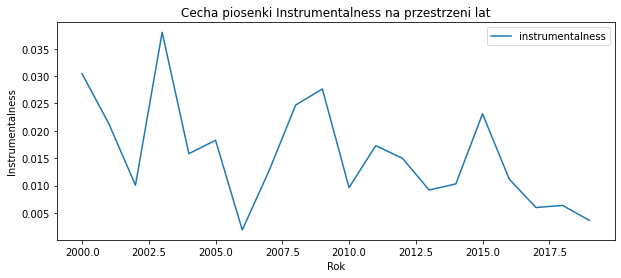

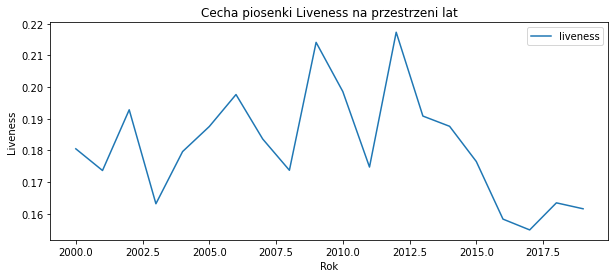

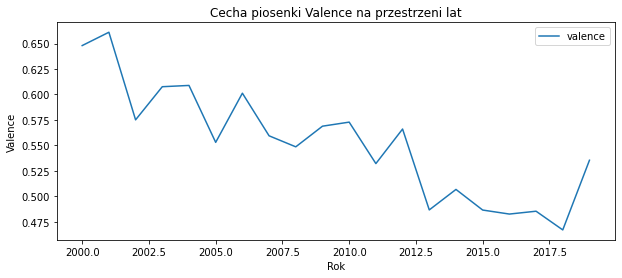

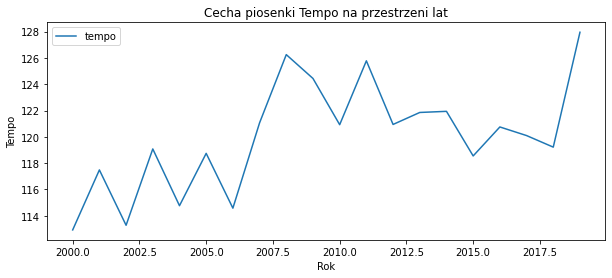

In [11]:
#zmiany piosenek na przestrzeni lat
def plot_numericals(df, var):
    fig, ax = plt.subplots(figsize=(10,4))
    dist = df[['year',var['key']]].groupby('year').mean()
    dist.plot(kind="line", ax=ax,title=f"Cecha piosenki {var['title']} na przestrzeni lat")
    plt.xlabel("Rok")
    plt.ylabel(var['title'])
plots = []

for i in df.select_dtypes("number").columns:
    if i == "year":
        pass
    else:

        plots.append({
            "key":i,
            "title": i.replace(i[0],i[0].upper(),1)
        })
for var in plots:
    plot_numericals(df, var)

In [27]:
from plotly.subplots import make_subplots

histogram_labels = ['popularity',
                    'danceability', 
                    'energy', 
                    'speechiness', 
                    'loudness', 
                    'acousticness', 
                    'liveness', 
                    'instrumentalness',
                    'valence',
                    'tempo'
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df, 
                       histogram_labels[i], 
                       title=f'Ilosc {histogram_labels[i]} w piosenkach', 
                       height=400, 
                       width=500,
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

Text(0.5, 0, 'Artysta')

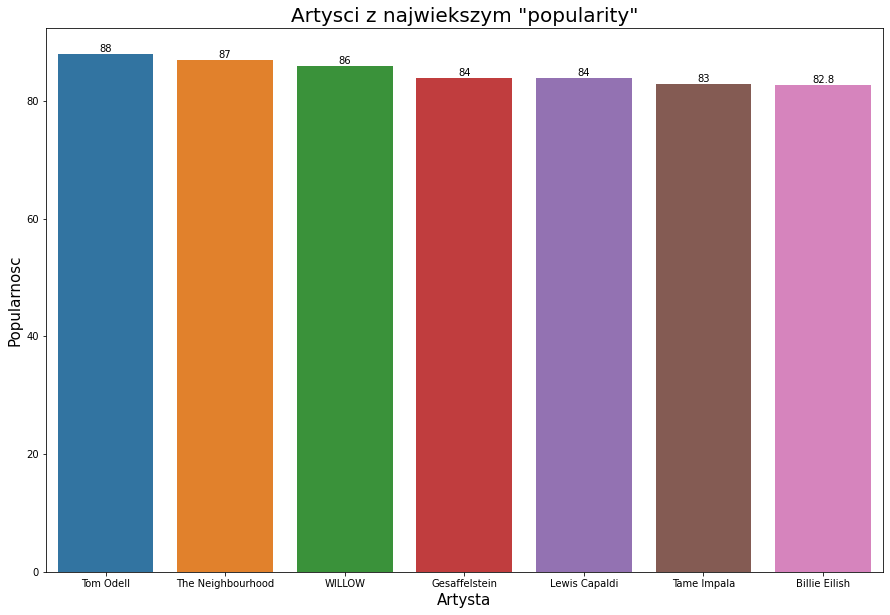

In [13]:
df_artist_mean = df.groupby(['artist']).mean().sort_values(['popularity'], ascending=False)
plt.figure(figsize=(15,10))
ax = sns.barplot(data=df_artist_mean.head(7), x=df_artist_mean.head(7).index, y='popularity')
ax.bar_label(ax.containers[0],  fontsize=10)
ax.set_title('Artysci z najwiekszym "popularity"', fontsize=20)
ax.set_ylabel('Popularnosc', fontsize=15)
ax.set_xlabel('Artysta', fontsize=15)

In [28]:
px.pie(values=[artist[:50].sum(),2000-artist[:50].sum()], 
       names=['top 50 artystow',f'pozostale {835-50} artystow'], 
       title="Ilosc piosenek top 50 artystow w danych",
       color_discrete_sequence = ['green', 'blue']
      ).update_traces(textinfo='value+percent')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



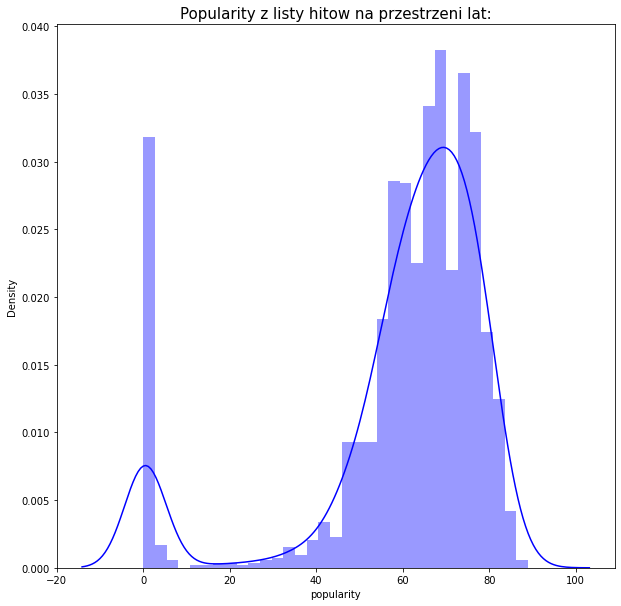

Srednie Popularity z listy hitow: 59.80541368743616
Maksymalne Populaitry z listy hitow:



,artist,song,duration_ms,explicit,year,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,-2.81,1,0.0336,0.0495,0.0177,0.101,0.398,124.053,"rock, pop"


In [15]:
plt.figure(figsize=(10,10))
plt.title("Popularity z listy hitow na przestrzeni lat:",size=15)
sns.distplot(df['popularity'],color="b")
plt.show()
print("Srednie Popularity z listy hitow:",df['popularity'].mean())
print("Maksymalne Populaitry z listy hitow:\n")
df.loc[df['popularity']==df['popularity'].max()]

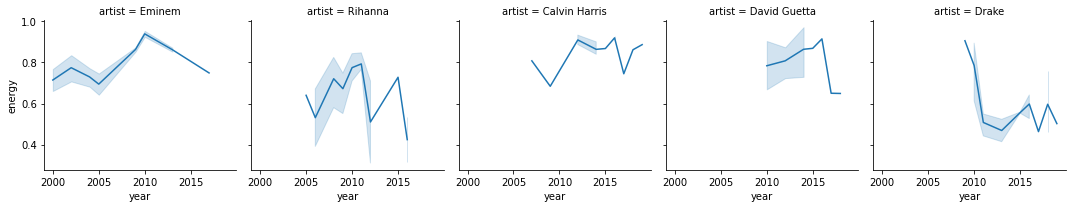

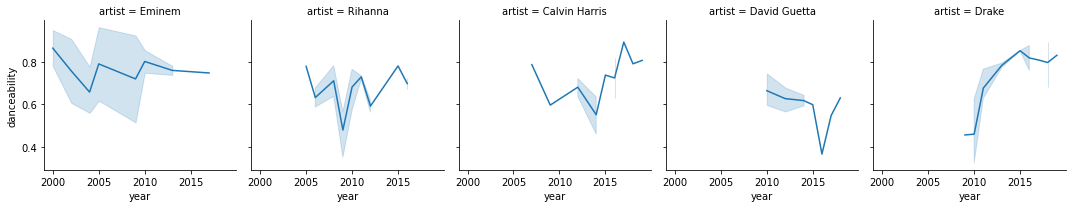

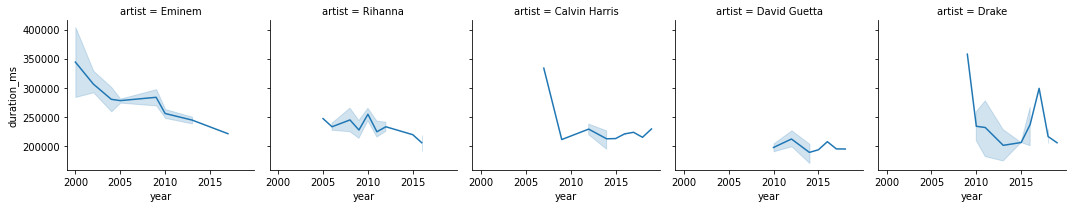

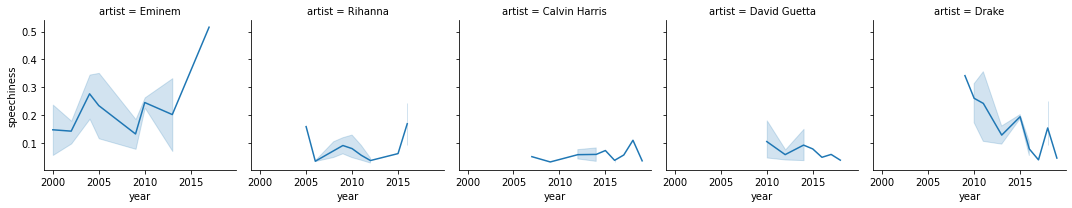

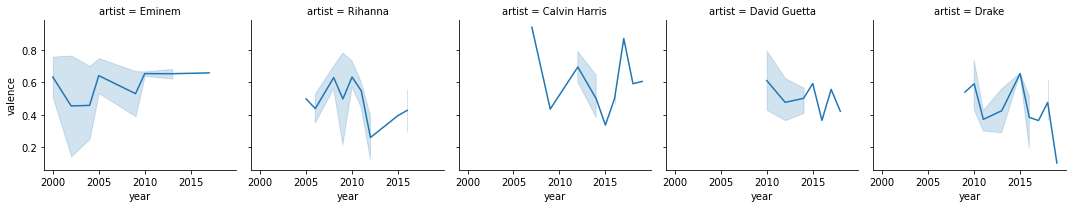

In [16]:
#Top 5 artystow z najwieksza iloscia hitow i zmiany ich piosenek na przestrzeni lat
top_5  = df['artist'].value_counts().head(5).index

a = df[df['artist'].isin(top_5.to_list())]

for stat in ["energy","danceability","duration_ms","speechiness","valence"]:
    g = sns.FacetGrid(a, col="artist")
    g.map_dataframe(sns.lineplot, x="year",y=stat)

Text(0.5, 1.0, 'Tempo (bpm) and Danceability Corelation')

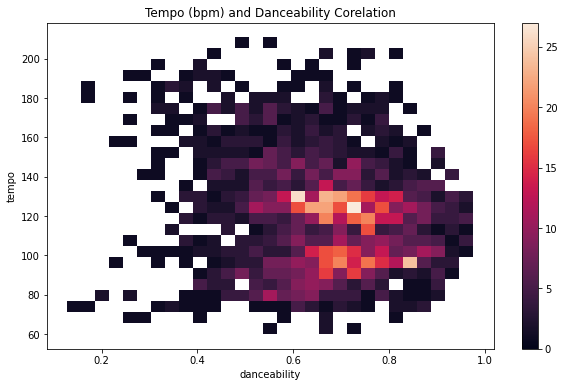

In [17]:
#sprawdzam najlepsze tempo do tanca
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(df,y="tempo",x="danceability",cbar=True,cmap="rocket").set_title("Tempo (bpm) and Danceability Corelation")